$
    \newcommand{\RR}{\mathbf{R}}
    \newcommand{\dv}[3][]{\frac{d^{#1} #2}{d {#3}^{#1}}}
    \newcommand{\dwrt}[2][]{\frac{d^{#1}}{d {#2}^{#1}}}
    \newcommand{\pdv}[3][]{\frac{\partial^{#1} #2}{\partial {#3}^{#1}}}
    \newcommand{\pdwrt}[2][]{\frac{\partial^{#1}}{\partial {#2}^{#1}}}
    \newcommand{\dd}[2][]{\, d^{#1}#2}
    \newcommand{\qty}[1]{\left[#1 \right]}
    \renewcommand{\exp}[1]{e^{#1}}
    \newcommand{\qq}[1]{\qquad \text{#1}\qquad}
    \newcommand{\leadsto}{\quad & \implies \quad}
$

# MATH 310-10: Project 2
- Submitted 10/3/17 by Colton Grainger for MATH 310-10: Ordinary Differential Equations, Engineering Outreach
- **Text:** http://www.webpages.uidaho.edu/~barannyk/Teaching/matlab_project2.pdf

## Euler Method
I've defined the Python function `euler` with a while loop. It returns a list of ordered pairs.

In [1]:
def euler (f, x0, y0, h, xmax):
    x, y = x0, y0
    xd, yd = [x0], [y0]
    while x < xmax:
        y = y + h*f(y, x)
        yd.append(y)
        x = x + h
        xd.append(x)
    return(zip(xd,yd))

### &sect; 2.4 Prob 17

We approximate solutions to the IVP $y' = x^2 + y^2,\ y(0)=0$ on the interval $[0,1]$.
- I'll compute with step sizes `h = 0.1, 0.02, 0.004, 0.0008`. 
    - We'll generate lists with `11, 51, 251, 1251` ordered pairs, respectively.
- Then I'll compile the data into a table, aligned `10` ordered pairs from each method.

In [2]:
def f(y, x):
    return x^2 + y^2

In [3]:
sols = [euler(f, 0, 0, h, 1) for h in [0.1, 0.02, 0.004, 0.0008]]

In [4]:
for j in range (10):
    print 'x =',j+1,'/10, y =',[N(sols[i][(5^i)*j+1][0], digits = 4) for i in range(4)]

x = 1 /10, y = [0.1000, 0.02000, 0.004000, 0.0008000]
x = 2 /10, y = [0.2000, 0.1200, 0.1040, 0.1008]
x = 3 /10, y = [0.3000, 0.2200, 0.2040, 0.2008]
x = 4 /10, y = [0.4000, 0.3200, 0.3040, 0.3008]
x = 5 /10, y = [0.5000, 0.4200, 0.4040, 0.4008]
x = 6 /10, y = [0.6000, 0.5200, 0.5040, 0.5008]
x = 7 /10, y = [0.7000, 0.6200, 0.6040, 0.6008]
x = 8 /10, y = [0.8000, 0.7200, 0.7040, 0.7008]
x = 9 /10, y = [0.9000, 0.8200, 0.8040, 0.8008]
x = 10 /10, y = [1.000, 0.9200, 0.9040, 0.9008]


Here's a plot of the slope field and our approximations, which appear to be converging.

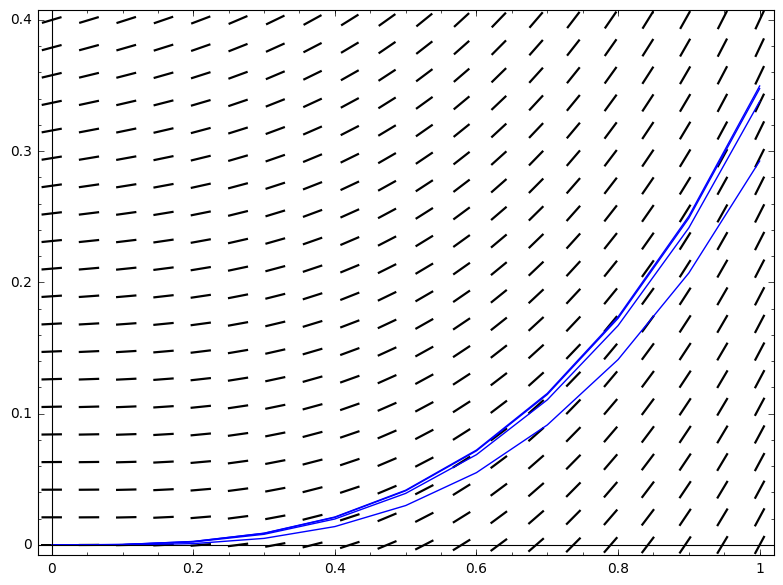

In [5]:
p = sum([list_plot([sols[i][(5^i)*j] for j in range (11)],plotjoined=True) for i in range(4)])
x, y = var('x y')
sf = plot_slope_field(x^2 + y^2,(x, 0, 1),(y, 0, 0.4))
show(p + sf)

### &sect; 2.4 Prob 21

We approximate solutions to the IVP $y' = \log(y),\ y(1)=2$ on the interval $[1,2]$.
- I'll compute with step sizes `h = 0.1, 0.02, 0.004, 0.0008`. 

In [6]:
def f(y, x):
    return log(y)

In [7]:
sols = [euler(f, 1, 2, h, 2) for h in [0.1, 0.02, 0.004, 0.0008]]

In [8]:
for j in range (10):
    print 'x = 1 +',j+1,'/10, y =',[N(sols[i][(5^i)*j+1][0], digits = 5) for i in range(4)]

x = 1 + 1 /10, y = [1.1000, 1.0200, 1.0040, 1.0008]
x = 1 + 2 /10, y = [1.2000, 1.1200, 1.1040, 1.1008]
x = 1 + 3 /10, y = [1.3000, 1.2200, 1.2040, 1.2008]
x = 1 + 4 /10, y = [1.4000, 1.3200, 1.3040, 1.3008]
x = 1 + 5 /10, y = [1.5000, 1.4200, 1.4040, 1.4008]
x = 1 + 6 /10, y = [1.6000, 1.5200, 1.5040, 1.5008]
x = 1 + 7 /10, y = [1.7000, 1.6200, 1.6040, 1.6008]
x = 1 + 8 /10, y = [1.8000, 1.7200, 1.7040, 1.7008]
x = 1 + 9 /10, y = [1.9000, 1.8200, 1.8040, 1.8008]
x = 1 + 10 /10, y = [2.0000, 1.9200, 1.9040, 1.9008]


## Improved Euler

In [9]:
def impeuler (f, x0, y0, h, xmax):
    x = x0
    u, y = y0, y0
    xd, yd = [x0], [y0]
    while x < xmax:
        u = y + h*f(y, x)
        y = y + (h/2)*(f(y, x) + f(u, x + h))
        yd.append(y)
        x = x + h
        xd.append(x)
    return(zip(xd,yd))

### &sect; 2.5 Prob 29

Consider the IVP $P' = 0.0225P - 0.0003P^2,\ P(0) = 25$ on the interval $[0,\infty)$.

In [10]:
def f(P, t):
    return 0.0225*P - 0.0003*P^2

Let's approximate with the **improved Euler method**.
1. First with step size `h = 1`.
2. Then with step size `h = 0.5`.

In [11]:
sols = [impeuler(f, 0, 25, 1, 10) for h in [1, 0.5]]

In [12]:
for j in range (11):
    print 't =',j,'  P =',[N(sols[i][j][1], digits = 5) for i in range(2)]

t = 0   P = [25.000, 25.000]
t = 1   P = [25.376, 25.376]
t = 2   P = [25.756, 25.756]
t = 3   P = [26.137, 26.137]
t = 4   P = [26.522, 26.522]
t = 5   P = [26.909, 26.909]
t = 6   P = [27.298, 27.298]
t = 7   P = [27.690, 27.690]
t = 8   P = [28.084, 28.084]
t = 9   P = [28.480, 28.480]
t = 10   P = [28.879, 28.879]


What percentage of the limiting population $P = 75$ is attained after 5 years? 10 years? 

In [13]:
print "After 5 years", N(100*(sols[0][5][1]/75), digits = 4)
print "After 10 years", N(100*(sols[0][10][1]/75), digits = 4)

After 5 years 35.88
After 10 years 38.51


Notice there's no difference between the approximations at $3$ decimal places. (It's because the graph of the solution has nearly zero curvature until $t > 60$. That is, even large step sizes can closely approximate constant slope.) 

Here's a plot carried to $100$ years.

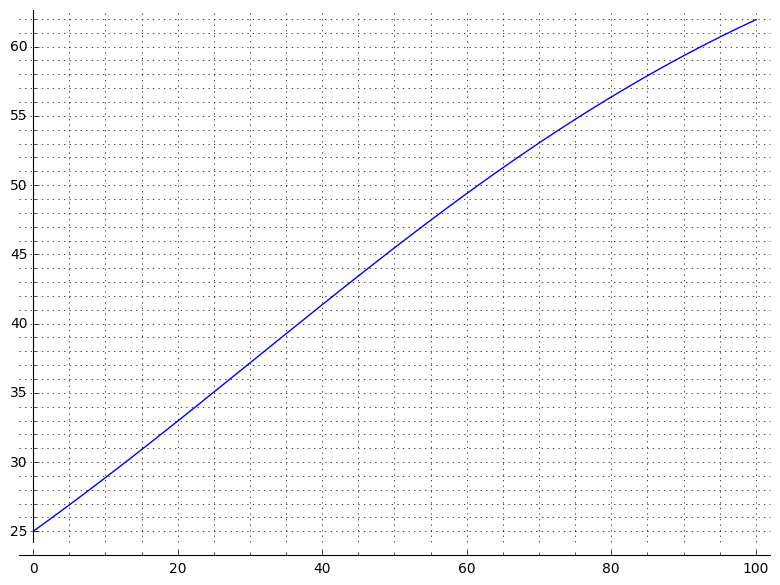

In [14]:
list_plot(impeuler(f, 0, 25, 1, 100), plotjoined = True, color = 'blue', gridlines = 'minor')

## Runge-Kutta 4th order

In [15]:
def rk4 (f, x0, y0, h, xmax):
    x = x0
    y = y0
    xd, yd = [x0], [y0]
    while x < xmax:
        #u1 = y
        m1 = f(y, x)
        
        u2 = y + (h/2)*m1
        m2 = f(u2, x + h/2)
        
        u3 = y + (h/2)*m2
        m3 = f(u3, x + h/2)
        
        u4 = y + h*m3
        m4 = f(u4, x + h)

        y = y + (h/6)*(m1 + 2*m2 + 2*m3 + m4)
        yd.append(y)
        x = x + h
        xd.append(x)
    return(zip(xd,yd))

### &sect; 2.6 Prob 29

Consider the IVP $v' = -0.04\cdot v - 9.8,\ v(0) = 49$ on the interval $[0,10]$.

In [16]:
def f(v, t):
    return -0.04*v - 9.8

Let's approximate with the **Runge-Kutta 4th order method**.
1. First with step size `h = 0.1`.
2. Then with step size `h = 0.05`.
3. Lastly we compare values to the exact solution $v(t) = 294e^{-t/25}-245$.

In [17]:
sols = [rk4(f, 0, 49, h, 10) for h in [0.1, 0.05]]

In [18]:
for j in range (11):
    print 't =',j,'  v =',[N(sols[i][(2^i)*10*j][1], digits = 5) for i in range(2)], '  exact = ', n(294*exp(-j/25)-245, digits = 5)

t = 0   v = [49.000, 49.000]   exact =  49.000
t = 1   v = [37.472, 37.472]   exact =  37.472
t = 2   v = [26.396, 26.396]   exact =  26.396
t = 3   v = [15.755, 15.755]   exact =  15.754
t = 4   v = [5.5303, 5.5303]   exact =  5.5300
t = 5   v = [-4.2932, -4.2932]   exact =  -4.2932
t = 6   v = [-13.731, -13.731]   exact =  -13.731
t = 7   v = [-22.800, -22.800]   exact =  -22.800
t = 8   v = [-31.512, -31.512]   exact =  -31.512
t = 9   v = [-39.883, -39.883]   exact =  -39.883
t = 10   v = [-47.926, -47.926]   exact =  -47.926


The approximations and the exact solution agree to $3$ decimal places, save for the values at which $\frac{dv}{dt} \approx 0$, where the approximations appear to slightly lag behind the exact solution. Here's a plot.

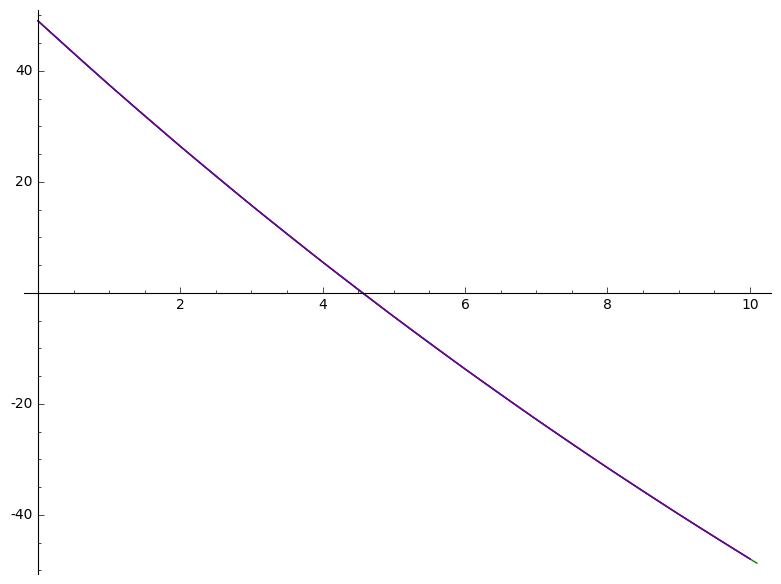

In [19]:
sum([
    list_plot(rk4(f, 0, 49, 0.1, 10), plotjoined = True, color = 'green'),
    list_plot(rk4(f, 0, 49, 0.05, 10), plotjoined = True, color = 'blue'),   
    list_plot([(t, 294*exp(-t/25)-245) for t in [0, 1,.. ,10]], plotjoined = True, color = 'purple')  
])

Looking at the graph of the velocity, it's natural for us to integrate. 

We can approximate the position function $y(t)$ with the Reimann sum $$\sum_{n=0}^{t/h} v(t) \cdot h$$ where $h = 0.05$ (noting that $t/h$ is the number of steps to take).

In [20]:
def y(t):
    return sum([sols[1][n][1]*0.05 for n in range((t)/0.05)])

Let's compare these values to the exact solution $y(t) = 7350(1-e^{-t/25})-245t$.

In [21]:
for t in range(11):
    print "t = ", t, "   y = ", N(y(t), digits = 5), "   exact = ", N(7350*(1-exp(-t/25))-245*t, digits = 5)

t =  0    y =  0.00000    exact =  0.00000
t =  1    y =  43.486    exact =  43.195
t =  2    y =  75.660    exact =  75.094
t =  3    y =  96.966    exact =  96.141
t =  4    y =  107.83    exact =  106.75
t =  5    y =  108.66    exact =  107.33
t =  6    y =  99.854    exact =  98.289
t =  7    y =  81.785    exact =  79.984
t =  8    y =  54.818    exact =  52.805
t =  9    y =  19.302    exact =  17.078
t =  10    y =  -24.428    exact =  -26.852


Because approximation's *velocity* lags slightly behind the exact solution, the approximation for $y$ attains a greater maximum value. 

**Note:** If the exact solution were not available, we could determine the maximum height by taking a Riemann sum to the value of $\tau$ for which $\frac{dv}{dt} \approx 0$. Indeed, $\tau$ is the ascent time. To find the descent time, we need to find the time $\tau_f$ such that $y(\tau_f) \approx 0$. This boils down to writing a while loop which proceeds until the Riemann sum representing the position is negative.